https://www.kaggle.com/datasets/agatii/total-sale-2018-yearly-data-of-grocery-shop?resource=download&select=SELL_1.csv

# Analyze data from Polish store
### We will analyze 3 different files from the project
First, we will import the necessary libraries for the project

In [1]:
import pandas as pd

import numpy as np

import csv

In [2]:
import seaborn as sns

import matplotlib

import matplotlib.pyplot as plt

import matplotlib.mlab as mlab

plt.style.use('ggplot')

from matplotlib.pyplot import figure

In [4]:
#Change the current directory
import os

os.chdir(r'C:\Users\jorge\Downloads\Grocery shop data')

#Pick the csv
dfDaySell = pd.read_csv(r'C:\Users\jorge\OneDrive\Escritorio\Polish store analysis\Analisis-de-tienda-Poland\Day_sell_24_12_18.csv', sep=';', decimal=',')

We start by analyzing the data and data types of each of the columns in the files.\
We clean all the necessary data.\
### We start by the DaySell file
The DaySell file contains 362 rows and 5 columns.

In [5]:
dfDaySell.shape

(362, 5)

### Change data type and column names
We will need to change the data type of the Date field and the names of the other columns.

In [6]:
dfDaySell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    361 non-null    object 
 1   zn      362 non-null    float64
 2   sb      362 non-null    float64
 3   tax     362 non-null    float64
 4   marza   362 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.3+ KB


### Modify date structure
While converting the Date field to date type, some of the dates have the day in the month's place and viceversa, we will fix this.\
The incorrect dates are the ones before the 13th day of each month.

In [7]:
#Convert the 'Date' column to datetime
dfDaySell['Date'] = pd.to_datetime(dfDaySell['Date'])

dfDaySell['Date'].head(25)

0    2017-12-24
1    2017-12-27
2    2017-12-28
3    2017-12-29
4    2017-12-30
5    2017-12-31
6    2018-01-01
7    2018-02-01
8    2018-03-01
9    2018-04-01
10   2018-05-01
11   2018-06-01
12   2018-07-01
13   2018-08-01
14   2018-09-01
15   2018-10-01
16   2018-11-01
17   2018-12-01
18   2018-01-13
19   2018-01-14
20   2018-01-15
21   2018-01-16
22   2018-01-17
23   2018-01-18
24   2018-01-19
Name: Date, dtype: datetime64[ns]

In [8]:
#Incorrect dates from dataset
incorrect_dates = dfDaySell[dfDaySell['Date'].dt.day < 13]

print(incorrect_dates['Date'].head(25))

6    2018-01-01
7    2018-02-01
8    2018-03-01
9    2018-04-01
10   2018-05-01
11   2018-06-01
12   2018-07-01
13   2018-08-01
14   2018-09-01
15   2018-10-01
16   2018-11-01
17   2018-12-01
37   2018-01-02
38   2018-02-02
39   2018-03-02
40   2018-04-02
41   2018-05-02
42   2018-06-02
43   2018-07-02
44   2018-08-02
45   2018-09-02
46   2018-10-02
47   2018-11-02
48   2018-12-02
65   2018-01-03
Name: Date, dtype: datetime64[ns]


The following code fixes the date structure in the Date field.

In [9]:
incorrect_dates['Date'] = incorrect_dates['Date'].apply(lambda date: date.replace(day=date.month, month=date.day))

print(incorrect_dates.head(20))

         Date       zn       sb     tax   marza
6  2018-01-01  1217.90  1770.28  284.98  267.40
7  2018-01-02  1994.54  2758.13  349.96  413.63
8  2018-01-03  2161.07  2972.24  371.92  439.25
9  2018-01-04  1990.31  2705.36  346.30  368.75
10 2018-01-05  3706.07  5086.59  604.85  775.67
11 2018-01-06  1433.94  2096.90  312.47  350.49
12 2018-01-07  1128.87  1547.66  226.34  192.45
13 2018-01-08  2428.43  3268.87  426.95  413.49
14 2018-01-09  2204.73  3079.31  402.68  471.90
15 2018-01-10  2429.82  3258.05  424.96  403.27
16 2018-01-11  1944.37  2693.39  341.73  407.29
17 2018-01-12  2548.01  3556.79  463.95  544.83
37 2018-02-01  2257.26  2725.32  326.09  141.97
38 2018-02-02  2299.24  3096.93  408.39  389.30
39 2018-02-03  3155.60  4287.65  535.86  596.19
40 2018-02-04  1065.16  1460.04  208.98  185.90
41 2018-02-05  2384.47  2725.30  333.47    7.36
42 2018-02-06  1992.72  2513.54  326.83  193.99
43 2018-02-07  2092.75  2756.85  337.68  326.42
44 2018-02-08  2832.77  3363.98  429.53 

C:\Users\jorge\AppData\Local\Temp/ipykernel_21204/4255676188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_dates['Date'] = incorrect_dates['Date'].apply(lambda date: date.replace(day=date.month, month=date.day))


In [10]:
dfDaySell.loc[incorrect_dates.index] = incorrect_dates

Now each of the dates have the following structure yyyy-mm-dd.

In [11]:
dfDaySell.head(25)

,Date,zn,sb,tax,marza
0,2017-12-24,1334.95,1903.82,284.07,284.80
1,2017-12-27,2154.04,2953.43,420.77,378.62
2,2017-12-28,2120.66,2914.02,397.22,396.14
3,2017-12-29,2280.09,3152.23,409.60,462.54
4,2017-12-30,3463.87,4823.36,629.44,730.05
5,2017-12-31,1761.74,2561.25,404.21,395.30
6,2018-01-01,1217.90,1770.28,284.98,267.40
7,2018-01-02,1994.54,2758.13,349.96,413.63
8,2018-01-03,2161.07,2972.24,371.92,439.25
9,2018-01-04,1990.31,2705.36,346.30,368.75


## Renaming the column names.
I've added the meaning of some of the headers included in the original csv as well as the calculation method for each of the columns.\
The margin is calculated as follows -> Marza (Margin) = Gross Sales (sb) - Taxes - Net Purchase (zn)\
The currency used is the following -> PLN currency = Polish Zloty

In [12]:
column_names = {
    'Date': 'Date',
    'zn': 'Net Purchase Per Day',
    'sb': 'Gross Sales Per Day',
    'tax': 'Sales Tax Paid Per Day',
    #marza refers to the margin
    'marza': 'Daily Margin'
}

# Rename the columns using the mapping
dfDaySell = dfDaySell.rename(columns=column_names)

dfDaySell.head(25)

,Date,Net Purchase Per Day,Gross Sales Per Day,Sales Tax Paid Per Day,Daily Margin
0,2017-12-24,1334.95,1903.82,284.07,284.80
1,2017-12-27,2154.04,2953.43,420.77,378.62
2,2017-12-28,2120.66,2914.02,397.22,396.14
3,2017-12-29,2280.09,3152.23,409.60,462.54
4,2017-12-30,3463.87,4823.36,629.44,730.05
5,2017-12-31,1761.74,2561.25,404.21,395.30
6,2018-01-01,1217.90,1770.28,284.98,267.40
7,2018-01-02,1994.54,2758.13,349.96,413.63
8,2018-01-03,2161.07,2972.24,371.92,439.25
9,2018-01-04,1990.31,2705.36,346.30,368.75


### We check if there are any empty values in the csv
There is one empty date cell.

In [13]:
dfDaySell.isnull().sum()

Date                      1
Net Purchase Per Day      0
Gross Sales Per Day       0
Sales Tax Paid Per Day    0
Daily Margin              0
dtype: int64

In [14]:
dfDaySell.loc[dfDaySell['Date'].isnull()]

,Date,Net Purchase Per Day,Gross Sales Per Day,Sales Tax Paid Per Day,Daily Margin
361,NaT,5414124.75,1218719.16,1220682.59,365027.61


Not sure if the values in the row with the missing date are common or if it is some kind of total.

This row is the last row of the dataset.

In [15]:
column_averages = dfDaySell[['Net Purchase Per Day', 'Gross Sales Per Day', 'Daily Margin']].mean()

print(column_averages)

Net Purchase Per Day    17313.490221
Gross Sales Per Day      6735.683536
Daily Margin             1588.182762
dtype: float64


### It seems like this is indeed a 'Total' or 'Summary' row, so I will remove this to get accurate data.

In [16]:
dfDaySell.drop(361, inplace=True)

In [17]:
dfDaySell.loc[dfDaySell['Date'].isnull()]

,Date,Net Purchase Per Day,Gross Sales Per Day,Sales Tax Paid Per Day,Daily Margin


### Now the code returns more accurate averages than before.
The following output shows both the averages of the 3 main columns and also shows the first 25 rows to double check if the mean of each column is close to the real values.

In [18]:
column_averages = dfDaySell[['Net Purchase Per Day', 'Gross Sales Per Day', 'Daily Margin']].mean()

print(column_averages)

dfDaySell.head(25)

Net Purchase Per Day    2363.874543
Gross Sales Per Day     3378.388587
Daily Margin             581.425346
dtype: float64


,Date,Net Purchase Per Day,Gross Sales Per Day,Sales Tax Paid Per Day,Daily Margin
0,2017-12-24,1334.95,1903.82,284.07,284.80
1,2017-12-27,2154.04,2953.43,420.77,378.62
2,2017-12-28,2120.66,2914.02,397.22,396.14
3,2017-12-29,2280.09,3152.23,409.60,462.54
4,2017-12-30,3463.87,4823.36,629.44,730.05
5,2017-12-31,1761.74,2561.25,404.21,395.30
6,2018-01-01,1217.90,1770.28,284.98,267.40
7,2018-01-02,1994.54,2758.13,349.96,413.63
8,2018-01-03,2161.07,2972.24,371.92,439.25
9,2018-01-04,1990.31,2705.36,346.30,368.75


## Outliers in columns
We will verify how many outliers there are for each of the relevant columns in the csv.

### Net Purchase Per Day Column

c:\Users\jorge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Net Purchase Per Day'>

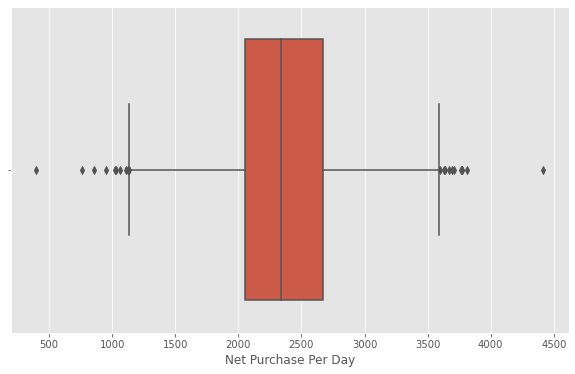

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(dfDaySell['Net Purchase Per Day'])

In [20]:
Q1 = dfDaySell['Net Purchase Per Day'].quantile(0.25)
Q3 = dfDaySell['Net Purchase Per Day'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_count = len(dfDaySell[(dfDaySell['Net Purchase Per Day'] < lower_bound) | (dfDaySell['Net Purchase Per Day'] > upper_bound)])

print("Number of outliers:", outliers_count)

Number of outliers: 22


This column contains some outliers but nothing out of the ordinary.

In [21]:
outlier_rows = dfDaySell[(dfDaySell['Net Purchase Per Day'] < lower_bound) | (dfDaySell['Net Purchase Per Day'] > upper_bound)]

print("Lower Bound: ", round(lower_bound, 2), ", Upper Bound: ", round(upper_bound, 2))

print("-------------------")

print(outlier_rows.sort_values(by='Net Purchase Per Day'))

Lower Bound:  1131.25 , Upper Bound:  3596.8
-------------------
          Date  Net Purchase Per Day  Gross Sales Per Day  \
307 2018-11-01                396.81               584.31   
154 2018-05-31                763.98              1156.74   
310 2018-11-04                857.75              1268.72   
89  2018-03-25                949.74              1397.60   
33  2018-01-28               1019.12              1454.72   
352 2018-12-16               1031.22              1512.84   
40  2018-02-04               1065.16              1460.04   
283 2018-10-07               1111.86              1690.06   
331 2018-11-25               1125.63              1675.96   
12  2018-01-07               1128.87              1547.66   
26  2018-01-21               1130.02              1644.11   
163 2018-06-09               3600.32              5262.52   
93  2018-03-29               3629.22              5273.42   
247 2018-09-01               3634.82              5325.80   
149 2018-05-26      

### Gross Sales Per Day
Same as before, this column's data contains some outliers but nothing out of the ordinary.

c:\Users\jorge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gross Sales Per Day'>

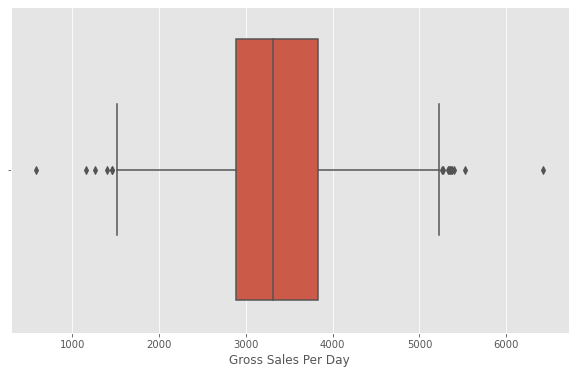

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(dfDaySell['Gross Sales Per Day'])

### Sales Tax Paid Per Day
Same as the past 2 columns. The column contains outliers but has no values out of the ordinary.

c:\Users\jorge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales Tax Paid Per Day'>

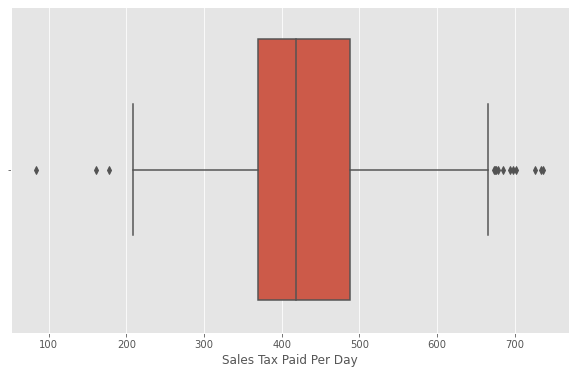

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(dfDaySell['Sales Tax Paid Per Day'])

### The 3 analyzed columns have a similar amount of outliers. 
You can see the amount of outliers per column in the output of the following code.\
The columns contain a similar amount of outliers which means they could be the result of some good/bad business days.

In [24]:
print('Total rows in dataset: ', len(dfDaySell))

Q1 = dfDaySell['Net Purchase Per Day'].quantile(0.25)
Q3 = dfDaySell['Net Purchase Per Day'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_purchase = len(dfDaySell[(dfDaySell['Net Purchase Per Day'] < lower_bound) | (dfDaySell['Net Purchase Per Day'] > upper_bound)])

print("Number of outliers (Purchase):", outliers_purchase)

Q1 = dfDaySell['Gross Sales Per Day'].quantile(0.25)
Q3 = dfDaySell['Gross Sales Per Day'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_sales = len(dfDaySell[(dfDaySell['Gross Sales Per Day'] < lower_bound) | (dfDaySell['Gross Sales Per Day'] > upper_bound)])

print("Number of outliers (Sales):", outliers_sales)

Q1 = dfDaySell['Sales Tax Paid Per Day'].quantile(0.25)
Q3 = dfDaySell['Sales Tax Paid Per Day'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_salesTax = len(dfDaySell[(dfDaySell['Sales Tax Paid Per Day'] < lower_bound) | (dfDaySell['Sales Tax Paid Per Day'] > upper_bound)])

print("Number of outliers (Sales Tax):", outliers_salesTax)

Q1 = dfDaySell['Daily Margin'].quantile(0.25)
Q3 = dfDaySell['Daily Margin'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_dailyMargin = len(dfDaySell[(dfDaySell['Daily Margin'] < lower_bound) | (dfDaySell['Daily Margin'] > upper_bound)])

print("Number of outliers (Daily Margin):", outliers_dailyMargin)



Total rows in dataset:  361
Number of outliers (Purchase): 22
Number of outliers (Sales): 16
Number of outliers (Sales Tax): 14
Number of outliers (Daily Margin): 11


### Write data in a new csv file
We will write the clean data to a new csv so we can also keep the original csv for future reference.

In [25]:
dfDaySell.to_csv('newDaySellFile.csv', index=False)

## Analyze data from new csv - Monthly sales by product
Instead of using a '.' as a decimal for the float fields, ';' were used. We had to adjust this parameter in the pd.read_csv.

In [98]:
dfMonthlySalesByProduct = pd.read_csv(r'C:\Users\jorge\OneDrive\Escritorio\Polish store analysis\Analisis-de-tienda-Poland\SELL_1.csv', sep=';', decimal=',', encoding='latin1')

### Cells in this csv are not empty. 
The only issue found at first sight is the dadta type of the date field and the data type of field pce_zn ("Net price of purchase").\
We will modify the data types.

In [40]:
dfMonthlySalesByProduct.shape

(23180, 16)

In [41]:
dfMonthlySalesByProduct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23180 entries, 0 to 23179
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        23180 non-null  object 
 1   PKod        23180 non-null  int64  
 2   Pgroup      23180 non-null  object 
 3   Pname       23180 non-null  object 
 4   Pquantity   23180 non-null  float64
 5   pce_zn      23180 non-null  object 
 6   pwa_zn      23180 non-null  float64
 7   pce_sn      23180 non-null  float64
 8   pwa_sn      23180 non-null  float64
 9   pce_sb      23180 non-null  float64
 10  pwa_sb      23180 non-null  float64
 11  pudzsb      23180 non-null  float64
 12  pmarza      23180 non-null  float64
 13  pmarzajedn  23180 non-null  float64
 14  pkwmarza    23180 non-null  float64
 15  pudzmarza   23180 non-null  float64
dtypes: float64(11), int64(1), object(4)
memory usage: 2.8+ MB


Date field has been corrected with the following code.

In [99]:
dfMonthlySalesByProduct['Date'] = pd.to_datetime(dfMonthlySalesByProduct['Date'])

dfMonthlySalesByProduct

,Date,PKod,Pgroup,Pname,Pquantity,pce_zn,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,"1,77",1.77,2.57,2.57,2.78,2.78,0.00,31.13,0.80,0.80,0.01
1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1.0,"3,2",3.20,5.68,5.68,6.99,6.99,0.01,43.66,2.48,2.48,0.03
2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
4,2018-01-01,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,"2,68",10.72,2.85,11.40,3.99,11.98,0.01,5.96,0.17,0.68,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,2018-01-12,6590,GENERAL,ZURAWINA 80 G HELIO,6.0,"1,85",11.10,3.05,18.30,3.29,19.74,0.02,39.34,1.20,7.20,0.04
23176,2018-01-12,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2.0,"4,51",9.02,6.19,12.38,6.69,13.38,0.01,27.14,1.68,3.36,0.02
23177,2018-01-12,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2.0,"1,83",3.66,2.62,5.24,3.22,6.44,0.01,30.15,0.79,1.58,0.01
23178,2018-01-12,1775,GENERAL,ZUREK BUTELKA 0_5 L,2.0,"1,31",2.62,1.48,2.96,1.60,3.20,0.00,11.49,0.17,0.34,0.00


### Values with blank spaces in column 'pce_zn' as well as ',' instead of '.' for decimal values.
This has been corrected with the following lines of code.

In [43]:
incorrect_numbersPCE_ZN = (dfMonthlySalesByProduct[dfMonthlySalesByProduct['pce_zn'].str.contains(' ')])

print(incorrect_numbersPCE_ZN.head())

            Date  PKod        Pgroup                       Pname  Pquantity  \
13428 2018-01-08  6971  GENERAL_FOOD  ALMETTE Z RZODKIEWKA 150 G        6.0   

      pce_zn  pwa_zn  pce_sn  pwa_sn  pce_sb  pwa_sb  pudzsb  pmarza  \
13428          18.54    2.56   15.35    2.69   16.14    0.01  -20.78   

       pmarzajedn  pkwmarza  pudzmarza  
13428       -0.53     -3.19      -0.01  


In [64]:
dfMonthlySalesByProduct.loc[13428, 'pce_zn'] = np.nan

incorrect_numbersPCE_ZN = dfMonthlySalesByProduct[dfMonthlySalesByProduct['pce_zn'].str.contains(' ', na=False)]
if len(incorrect_numbersPCE_ZN) > 0:
    print(incorrect_numbersPCE_ZN)
else:
    print("No remaining rows with empty strings.")


No remaining rows with empty strings.


We replace the ',' for '.' and change the data type to numeric.

In [65]:
dfMonthlySalesByProduct['pce_zn'] = pd.to_numeric(dfMonthlySalesByProduct['pce_zn'].str.replace(',', '.'))

dfMonthlySalesByProduct

,Date,PKod,Pgroup,Pname,Pquantity,pce_zn,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,1.77,1.77,2.57,2.57,2.78,2.78,0.00,31.13,0.80,0.80,0.01
1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1.0,3.20,3.20,5.68,5.68,6.99,6.99,0.01,43.66,2.48,2.48,0.03
2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,2.68,10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,2.68,10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
4,2018-01-01,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,2.68,10.72,2.85,11.40,3.99,11.98,0.01,5.96,0.17,0.68,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,2018-01-12,6590,GENERAL,ZURAWINA 80 G HELIO,6.0,1.85,11.10,3.05,18.30,3.29,19.74,0.02,39.34,1.20,7.20,0.04
23176,2018-01-12,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2.0,4.51,9.02,6.19,12.38,6.69,13.38,0.01,27.14,1.68,3.36,0.02
23177,2018-01-12,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2.0,1.83,3.66,2.62,5.24,3.22,6.44,0.01,30.15,0.79,1.58,0.01
23178,2018-01-12,1775,GENERAL,ZUREK BUTELKA 0_5 L,2.0,1.31,2.62,1.48,2.96,1.60,3.20,0.00,11.49,0.17,0.34,0.00


### 12 Different dates. One per each month of the year.
Date format gives the impression of being the first 12 days of January 2018. We will add an extra column to show the specific month.

In [93]:
dfMonthlySalesByProduct['Date'].unique()

array(['2018-01-01T00:00:00.000000000', '2018-01-02T00:00:00.000000000',
       '2018-01-03T00:00:00.000000000', '2018-01-04T00:00:00.000000000',
       '2018-01-05T00:00:00.000000000', '2018-01-06T00:00:00.000000000',
       '2018-01-07T00:00:00.000000000', '2018-01-08T00:00:00.000000000',
       '2018-01-09T00:00:00.000000000', '2018-01-10T00:00:00.000000000',
       '2018-01-11T00:00:00.000000000', '2018-01-12T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [100]:
dfMonthlySalesByProduct['Date'] = dfMonthlySalesByProduct['Date'].apply(lambda date: date.replace(day=date.month, month=date.day))



dfMonthlySalesByProduct

,Date,PKod,Pgroup,Pname,Pquantity,pce_zn,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
0,2018-01-01,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,"1,77",1.77,2.57,2.57,2.78,2.78,0.00,31.13,0.80,0.80,0.01
1,2018-01-01,5986,CHEMISTRY,ACE 1 L,1.0,"3,2",3.20,5.68,5.68,6.99,6.99,0.01,43.66,2.48,2.48,0.03
2,2018-01-01,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
3,2018-01-01,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
4,2018-01-01,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,"2,68",10.72,2.85,11.40,3.99,11.98,0.01,5.96,0.17,0.68,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,2018-12-01,6590,GENERAL,ZURAWINA 80 G HELIO,6.0,"1,85",11.10,3.05,18.30,3.29,19.74,0.02,39.34,1.20,7.20,0.04
23176,2018-12-01,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2.0,"4,51",9.02,6.19,12.38,6.69,13.38,0.01,27.14,1.68,3.36,0.02
23177,2018-12-01,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2.0,"1,83",3.66,2.62,5.24,3.22,6.44,0.01,30.15,0.79,1.58,0.01
23178,2018-12-01,1775,GENERAL,ZUREK BUTELKA 0_5 L,2.0,"1,31",2.62,1.48,2.96,1.60,3.20,0.00,11.49,0.17,0.34,0.00


Added a new 'Month' column to better identify the sales period of each record.

In [101]:
dfMonthlySalesByProduct.insert(1, 'Month', dfMonthlySalesByProduct['Date'].dt.strftime('%B'))

dfMonthlySalesByProduct

,Date,Month,PKod,Pgroup,Pname,Pquantity,pce_zn,pwa_zn,pce_sn,pwa_sn,pce_sb,pwa_sb,pudzsb,pmarza,pmarzajedn,pkwmarza,pudzmarza
0,2018-01-01,January,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,"1,77",1.77,2.57,2.57,2.78,2.78,0.00,31.13,0.80,0.80,0.01
1,2018-01-01,January,5986,CHEMISTRY,ACE 1 L,1.0,"3,2",3.20,5.68,5.68,6.99,6.99,0.01,43.66,2.48,2.48,0.03
2,2018-01-01,January,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
3,2018-01-01,January,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
4,2018-01-01,January,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,"2,68",10.72,2.85,11.40,3.99,11.98,0.01,5.96,0.17,0.68,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23175,2018-12-01,December,6590,GENERAL,ZURAWINA 80 G HELIO,6.0,"1,85",11.10,3.05,18.30,3.29,19.74,0.02,39.34,1.20,7.20,0.04
23176,2018-12-01,December,19580,GENERAL_FOOD,ZURAWINA S?OIK 230 G,2.0,"4,51",9.02,6.19,12.38,6.69,13.38,0.01,27.14,1.68,3.36,0.02
23177,2018-12-01,December,10274,SWEETS,ZURAWINA W CZEKOLADZIE 70 G EURO,2.0,"1,83",3.66,2.62,5.24,3.22,6.44,0.01,30.15,0.79,1.58,0.01
23178,2018-12-01,December,1775,GENERAL,ZUREK BUTELKA 0_5 L,2.0,"1,31",2.62,1.48,2.96,1.60,3.20,0.00,11.49,0.17,0.34,0.00


We will rename the dataframe's columns so they are easier to understand.

In [102]:
column_names = {
    'PKod': 'Product_Id_Num',
    'Pgroup': 'Product_group',
    'Pname': 'Product_name',
    'Pquantity': 'Product_qty',
    'pce_zn': 'Net_price_purchase',
    'pwa_zn': 'Net_value_purchase',
    'pce_sn': 'Net_price_sale',
    'pwa_sn': 'Net_value_sale',
    'pce_sb': 'Gross_price_sale',
    'pwa_sb': 'Gross_value_sale',
    'pudzsb': 'Share_in_sales',
    'pmarza': 'Margin_percentage',
    'pmarzajedn': 'Unit_margin',
    'pkwmarza': 'Sell_margin',
    'pudzmarza': 'Share_in_margin',
}

# Rename the columns using the mapping
dfMonthlySalesByProduct = dfMonthlySalesByProduct.rename(columns=column_names)

dfMonthlySalesByProduct.head(5)

,Date,Month,Product_Id_Num,Product_group,Product_name,Product_qty,Net_price_purchase,Net_value_purchase,Net_price_sale,Net_value_sale,Gross_price_sale,Gross_value_sale,Share_in_sales,Margin_percentage,Unit_margin,Sell_margin,Share_in_margin
0,2018-01-01,January,5307,CHEMISTRY,PATYCZKI BELLA 200,1.0,"1,77",1.77,2.57,2.57,2.78,2.78,0.00,31.13,0.80,0.80,0.01
1,2018-01-01,January,5986,CHEMISTRY,ACE 1 L,1.0,"3,2",3.20,5.68,5.68,6.99,6.99,0.01,43.66,2.48,2.48,0.03
2,2018-01-01,January,399,DAIRY_CHESSE,ALMETTE CZOSNEK NIEDZWIEDZI 150GR,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
3,2018-01-01,January,2246,DAIRY_CHESSE,ALMETTE JOGURTOWY 150G HOCHLAND,4.0,"2,68",10.72,3.80,15.20,3.99,15.96,0.02,29.47,1.12,4.48,0.05
4,2018-01-01,January,2247,DAIRY_CHESSE,ALMETTE OGOREK/ZIOLA 150G,4.0,"2,68",10.72,2.85,11.40,3.99,11.98,0.01,5.96,0.17,0.68,0.01


In [72]:
unique_dates_month = pd.concat([dfMonthlySalesByProduct['Date'], dfMonthlySalesByProduct['Month']]).unique()

unique_dates_month

array([Timestamp('2018-01-01 00:00:00'), Timestamp('2018-02-01 00:00:00'),
       Timestamp('2018-03-01 00:00:00'), Timestamp('2018-04-01 00:00:00'),
       Timestamp('2018-05-01 00:00:00'), Timestamp('2018-06-01 00:00:00'),
       Timestamp('2018-07-01 00:00:00'), Timestamp('2018-08-01 00:00:00'),
       Timestamp('2018-09-01 00:00:00'), Timestamp('2018-10-01 00:00:00'),
       Timestamp('2018-11-01 00:00:00'), Timestamp('2018-12-01 00:00:00'),
       'January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

## Analyze data from Rotation Of Products

In [34]:
dfProductRotation = pd.read_csv(r'C:\Users\jorge\Downloads\Grocery shop data\ROTATION_of_products01.01.2018-09.01.2019.csv', sep=';', decimal=',', encoding='latin1')

In [35]:
dfProductRotation

,Pgroup,Lp,PKod,Pname,p_sale_in_time,Psale,Pavarage_stock,Rotation_in_days,Rotation_in_times
0,ART._HYGIENIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,1.0,8478.0,BAMBINO SZAMPON 400 ML,0.013369,5.0,0.0,0,NaN
2,,1.0,17048.0,BELLA PODPASKI BLUE MAX,0.024064,9.0,0.0,0,NaN
3,,1.0,41.0,BELLA PODPASKI NORMAL 20 B/SKRZYD,0.136364,51.0,0.0,0,NaN
4,,1.0,2155.0,BELLA PODPASKI PERF.BLUE 10,0.066845,25.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...
16329,,1.0,18937.0,ZESTAW PORZECZKOWA 350 ML +FANTA,0.000000,0.0,0.0,-,-
16330,,1.0,16148.0,"ZESTAW Z ZUBROWKA 0,7 L",0.000000,0.0,0.0,-,-
16331,,1.0,7453.0,"ZUBROWKA BIA?A 0,2 Z JALOWCEM",0.000000,0.0,0.0,-,-
16332,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
column_names = {
    'Pgroup': 'Product_group',
    'Lp': 'Numb_of_observations',
    'PKod': 'Product_ID_number',
    'Pname': 'Product_name',
    'p_sale_in_time': 'Sale_of_product_in_time',
    'Psale': 'Sale_amount',
    'Pavarage_stock': 'Avg_stock_left_at_store'
}

# Rename the columns using the mapping
dfProductRotation = dfProductRotation.rename(columns=column_names)

dfProductRotation.head(5)

,Product_group,Numb_of_observations,Product_ID_number,Product_name,Sale_of_product_in_time,Sale_amount,Avg_stock_left_at_store,Rotation_in_days,Rotation_in_times
0,ART._HYGIENIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,1.0,8478.0,BAMBINO SZAMPON 400 ML,0.013369,5.0,0.0,0,NaN
2,,1.0,17048.0,BELLA PODPASKI BLUE MAX,0.024064,9.0,0.0,0,NaN
3,,1.0,41.0,BELLA PODPASKI NORMAL 20 B/SKRZYD,0.136364,51.0,0.0,0,NaN
4,,1.0,2155.0,BELLA PODPASKI PERF.BLUE 10,0.066845,25.0,0.0,0,NaN


In [38]:
dfProductRotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16334 entries, 0 to 16333
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_group            16334 non-null  object 
 1   Numb_of_observations     16293 non-null  float64
 2   Product_ID_number        16293 non-null  float64
 3   Product_name             16293 non-null  object 
 4   Sale_of_product_in_time  16293 non-null  float64
 5   Sale_amount              16293 non-null  float64
 6   Avg_stock_left_at_store  16293 non-null  float64
 7   Rotation_in_days         16293 non-null  object 
 8   Rotation_in_times        12260 non-null  object 
dtypes: float64(5), object(4)
memory usage: 1.1+ MB


In [42]:
dfProductRotation.isnull().sum()

Product_group                 0
Numb_of_observations         41
Product_ID_number            41
Product_name                 41
Sale_of_product_in_time      41
Sale_amount                  41
Avg_stock_left_at_store      41
Rotation_in_days             41
Rotation_in_times          4074
dtype: int64

In [44]:
dfProductRotation.shape

(16334, 9)

In [46]:
emptyFromRotation = dfProductRotation[(dfProductRotation['Product_name'].isna())]

emptyFromRotation

,Product_group,Numb_of_observations,Product_ID_number,Product_name,Sale_of_product_in_time,Sale_amount,Avg_stock_left_at_store,Rotation_in_days,Rotation_in_times
0,ART._HYGIENIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,ARTICLE_OF_HOUSEHOLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,CHEMISTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2337,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3039,DISHES_FOR_CHILDREN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,LUNCH DINING DISHES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,EGGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109,PET'S FOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill the empty product category spaces with the corresponding category

In [53]:
dfProductRotation['Product_group'].replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [60]:
dfProductRotation['Product_group'].fillna(method='ffill', inplace=True)

dfProductRotation[(dfProductRotation['Product_name'].isna())]

,Product_group,Numb_of_observations,Product_ID_number,Product_name,Sale_of_product_in_time,Sale_amount,Avg_stock_left_at_store,Rotation_in_days,Rotation_in_times
0,ART._HYGIENIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,ARTICLE_OF_HOUSEHOLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,ARTICLE_OF_HOUSEHOLD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,CHEMISTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2337,CHEMISTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2821,CHEMISTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3039,DISHES_FOR_CHILDREN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,LUNCH DINING DISHES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3102,EGGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109,PET'S FOOD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
filtereddf = dfProductRotation[dfProductRotation['Product_group'].str.contains("TABLETS", na=False)]

filtereddf.head()

,Product_group,Numb_of_observations,Product_ID_number,Product_name,Sale_of_product_in_time,Sale_amount,Avg_stock_left_at_store,Rotation_in_days,Rotation_in_times
15226,TABLETS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15227,TABLETS,1.0,9358.0,BANDAZ 15 CM *4M,0.013369,5.0,0.0,0,NaN
15228,TABLETS,1.0,18740.0,OPASKA ELASTYCZNA 5M *10 CM,0.005348,2.0,0.0,0,NaN
15229,TABLETS,1.0,18742.0,OPASKA ELASTYCZNA 5M* 12 CM,0.013369,5.0,0.0,0,NaN
15230,TABLETS,1.0,15140.0,PLASTER POLSKI LEK OPATRUNKOWY,0.018717,7.0,0.0,0,NaN


### Now we delete the rows which were the headers of each of the categories

In [93]:
rowstodelete = dfProductRotation[dfProductRotation['Product_name'].isna()].index

dfProductRotation.drop(rowstodelete, inplace=True)

In [94]:
dfProductRotation

,Product_group,Numb_of_observations,Product_ID_number,Product_name,Sale_of_product_in_time,Sale_amount,Avg_stock_left_at_store,Rotation_in_days,Rotation_in_times
1,ART._HYGIENIC,1.0,8478.0,BAMBINO SZAMPON 400 ML,0.013369,5.0,0.0,0,NaN
2,ART._HYGIENIC,1.0,17048.0,BELLA PODPASKI BLUE MAX,0.024064,9.0,0.0,0,NaN
3,ART._HYGIENIC,1.0,41.0,BELLA PODPASKI NORMAL 20 B/SKRZYD,0.136364,51.0,0.0,0,NaN
4,ART._HYGIENIC,1.0,2155.0,BELLA PODPASKI PERF.BLUE 10,0.066845,25.0,0.0,0,NaN
5,ART._HYGIENIC,1.0,2918.0,BELLA PODPASKI PERFECTA GREEN,0.024064,9.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...
16328,VODKA_ALCOHOL,1.0,15622.0,"ZESTAW FINLANDIA 0,5 + 5 SZT MIN",0.000000,0.0,0.0,-,-
16329,VODKA_ALCOHOL,1.0,18937.0,ZESTAW PORZECZKOWA 350 ML +FANTA,0.000000,0.0,0.0,-,-
16330,VODKA_ALCOHOL,1.0,16148.0,"ZESTAW Z ZUBROWKA 0,7 L",0.000000,0.0,0.0,-,-
16331,VODKA_ALCOHOL,1.0,7453.0,"ZUBROWKA BIA?A 0,2 Z JALOWCEM",0.000000,0.0,0.0,-,-


In [96]:
saleOfProductInTime = dfProductRotation['Sale_of_product_in_time'].sum()

saleOfProductInTime

1008.2362193488999

In [98]:
value_counts = dfProductRotation['Product_name'].value_counts()

value_counts

TOREBKA                               28
LAURKA                                26
TOREBKA NA PREZENT                    16
ZNICZ                                 15
EQLUB 10 ML                           15
                                      ..
SZPINAK LISCIE W SOSIE SMIET.450 G     1
TORT LODOWY                            1
TRUSKAWKI                              1
TRUSKAWKI 450G HORTEX                  1
WHISKY BALLANTINES 07+SZKL             1
Name: Product_name, Length: 15404, dtype: int64

In [101]:
torebkaRows = dfProductRotation[dfProductRotation['Product_name'] == 'TOREBKA']

torebkaRows

,Product_group,Numb_of_observations,Product_ID_number,Product_name,Sale_of_product_in_time,Sale_amount,Avg_stock_left_at_store,Rotation_in_days,Rotation_in_times
452,CHEMISTRY,1.0,7847.0,TOREBKA,0.040107,15.0,0.0,0,NaN
453,CHEMISTRY,1.0,7852.0,TOREBKA,0.005348,2.0,0.0,0,NaN
2102,CHEMISTRY,1.0,7849.0,TOREBKA,0.000000,0.0,0.0,-,-
2103,CHEMISTRY,1.0,7850.0,TOREBKA,0.000000,0.0,0.0,-,-
2104,CHEMISTRY,1.0,7848.0,TOREBKA,0.000000,0.0,0.0,-,-
2105,CHEMISTRY,1.0,7851.0,TOREBKA,0.000000,0.0,0.0,-,-
7496,MILK,1.0,9122.0,TOREBKA,0.005348,2.0,0.0,0,NaN
8283,MILK,1.0,9121.0,TOREBKA,0.000000,0.0,1.0,-,-
10859,OCCASIONAL,1.0,5822.0,TOREBKA,0.002674,1.0,0.0,0,NaN
11130,OCCASIONAL,1.0,19569.0,TOREBKA,0.000000,0.0,0.0,-,-


## I could not find any logic in the product rotation file, we will use the other 2 csv files